In [ ]:
!pip install yfinance matplotlib -q

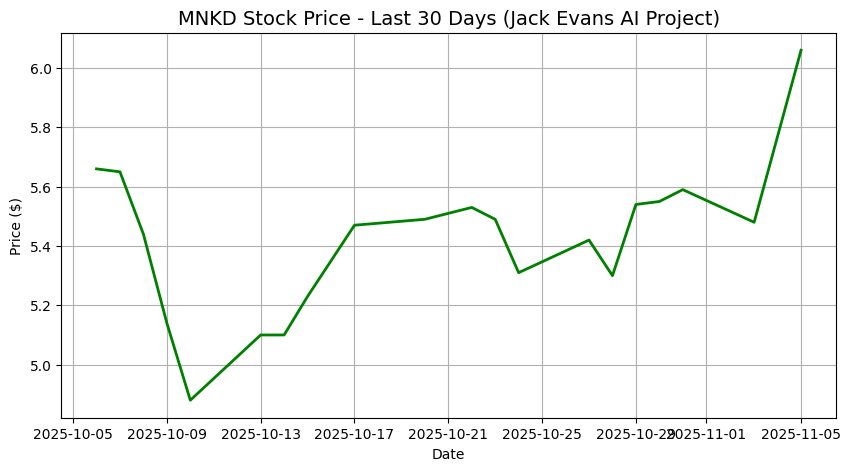

Latest price: $6.06


In [ ]:
#@title AI Finance Dashboard – Type Any Stock { run: "auto" }
ticker = "MNKD" #@param {type:"string"}

import yfinance as yf
import matplotlib.pyplot as plt

data = yf.Ticker(ticker).history(period="1mo")

plt.figure(figsize=(10, 5))
plt.plot(data.index, data['Close'], color='green', linewidth=2)
plt.title(f"{ticker.upper()} Stock Price - Last 30 Days (Jack Evans AI Project)", fontsize=14)
plt.xlabel("Date")
plt.ylabel("Price ($)")
plt.grid(True)
plt.show()

print(f"Latest price: ${data['Close'].iloc[-1]:.2f}")

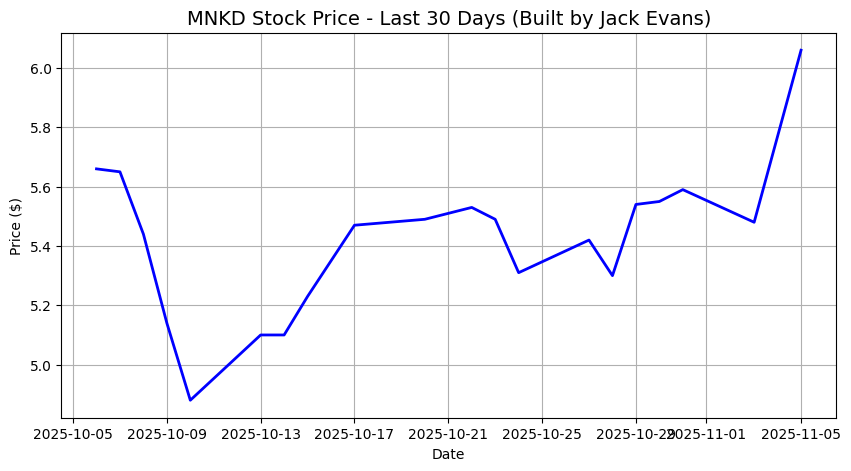

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(data.index, data['Close'], color='blue', linewidth=2)
plt.title(f"{ticker} Stock Price - Last 30 Days (Built by Jack Evans)", fontsize=14)
plt.xlabel("Date")
plt.ylabel("Price ($)")
plt.grid(True)
plt.show()

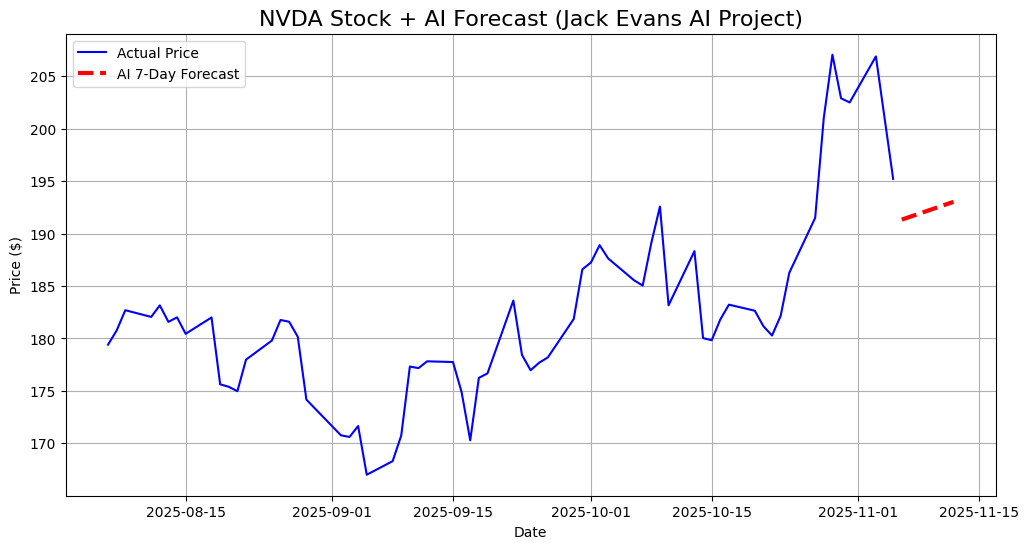

AI Predicts NVDA in 7 days: $193.02 (from $195.21 today)


In [20]:
#@title AI PRICE PREDICTION – Next 7 Days { run: "auto" }
ticker = "NVDA" #@param {type:"string"}

import yfinance as yf
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# 1. Get data
data = yf.Ticker(ticker).history(period="3mo")
prices = data['Close'].values
days = np.arange(len(prices)).reshape(-1, 1)

# 2. Train AI model
model = LinearRegression()
model.fit(days, prices)

# 3. Predict next 7 days
future_days = np.arange(len(prices), len(prices) + 7).reshape(-1, 1)
predictions = model.predict(future_days)

# 4. Plot actual + AI prediction
plt.figure(figsize=(12, 6))
plt.plot(data.index, prices, label="Actual Price", color='blue')
plt.plot(pd.date_range(start=data.index[-1], periods=8)[1:], predictions,
         label="AI 7-Day Forecast", color='red', linestyle='--', linewidth=3)
plt.title(f"{ticker} Stock + AI Forecast (Jack Evans AI Project)", fontsize=16)
plt.xlabel("Date")
plt.ylabel("Price ($)")
plt.legend()
plt.grid(True)
plt.show()

# Print prediction
print(f"AI Predicts {ticker} in 7 days: ${predictions[-1]:.2f} (from ${prices[-1]:.2f} today)")